In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as matplt
import yfinance as yf
import numpy as np
import plotly.graph_objects as go
import os
import mplfinance as mpf

 
from sklearn.model_selection import train_test_split 

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize


### Loading Doge-Coin data

In [ ]:
df = pd.read_csv("data/DOGE-USD.csv")

In [ ]:
display(df)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270
...,...,...,...,...,...,...,...
1800,2022-10-14,0.059666,0.060943,0.058315,0.058643,0.058643,242691429
1801,2022-10-15,0.058638,0.059567,0.058146,0.058580,0.058580,182208164
1802,2022-10-16,0.058583,0.059415,0.058583,0.058914,0.058914,162246280
1803,2022-10-17,0.058913,0.060057,0.058625,0.059935,0.059935,174261450


### Loading 10,000 Random Post of Dogecoin

In [ ]:
df_twt = pd.read_csv('data/randompersondogecoinpost.csv',on_bad_lines='skip')



In [ ]:
df_twt.head()

,Unnamed: 0,User,Date Created,Number of Likes,Source of Tweet,Tweet
0,0,webnowcompany,2020-12-30 23:58:38+00:00,1,webnowcompany,#DOGE #LTC #RDD #BTC #BCH #CAG #SPHR Dogecoin ...
1,1,webnowcompany,2020-12-30 23:58:38+00:00,0,webnowcompany,"#DOGE #RDD #BTC #BCH #RVN #ETN Reddcoin (RDD),..."
2,2,DanO37088867,2020-12-30 23:58:37+00:00,1,Twitter for Android,"@DogeTop5 If in secret, Musk has a team workin..."
3,3,marsbux,2020-12-30 23:57:18+00:00,3,Twitter Web App,@elonmusk Sure wish MarsBux would be the crypt...
4,4,x_xiishei,2020-12-30 23:55:52+00:00,0,Twitter Web App,@LilBibby_ invest into dogecoin


### Removing special character from Tweet columns

In [ ]:
df_twt["Tweet"] = df_twt["Tweet"].str.replace(r'[^\w\s]', '', regex=True)

In [ ]:
df_twt

,Unnamed: 0,User,Date Created,Number of Likes,Source of Tweet,Tweet
0,0,webnowcompany,2020-12-30 23:58:38+00:00,1,webnowcompany,DOGE LTC RDD BTC BCH CAG SPHR Dogecoin Review ...
1,1,webnowcompany,2020-12-30 23:58:38+00:00,0,webnowcompany,DOGE RDD BTC BCH RVN ETN Reddcoin RDD Ravencoi...
2,2,DanO37088867,2020-12-30 23:58:37+00:00,1,Twitter for Android,DogeTop5 If in secret Musk has a team working ...
3,3,marsbux,2020-12-30 23:57:18+00:00,3,Twitter Web App,elonmusk Sure wish MarsBux would be the crypto...
4,4,x_xiishei,2020-12-30 23:55:52+00:00,0,Twitter Web App,LilBibby_ invest into dogecoin
...,...,...,...,...,...,...
9996,9996,CEOofGlobalWarm,2020-12-17 05:55:43+00:00,0,Twitter for iPhone,rohmontgomery dogecoingtbitcoin
9997,9997,RichOToole,2020-12-17 05:53:53+00:00,11,Twitter for iPhone,Can elonmusk please tweet out for everyone to ...
9998,9998,RealDreamTanks,2020-12-17 05:52:54+00:00,0,Twitter for Android,jai_bhavnani AutismCapital DogeCoin httpstcomf...
9999,9999,EricLangleyx,2020-12-17 05:52:15+00:00,3,Twitter for iPhone,RichOToole If I live 5 years you owe me a doge...


In [ ]:
df_twt["Tweet"] = df_twt["Tweet"].replace("_", " ", regex=True)

In [ ]:
df_twt

,Unnamed: 0,User,Date Created,Number of Likes,Source of Tweet,Tweet
0,0,webnowcompany,2020-12-30 23:58:38+00:00,1,webnowcompany,DOGE LTC RDD BTC BCH CAG SPHR Dogecoin Review ...
1,1,webnowcompany,2020-12-30 23:58:38+00:00,0,webnowcompany,DOGE RDD BTC BCH RVN ETN Reddcoin RDD Ravencoi...
2,2,DanO37088867,2020-12-30 23:58:37+00:00,1,Twitter for Android,DogeTop5 If in secret Musk has a team working ...
3,3,marsbux,2020-12-30 23:57:18+00:00,3,Twitter Web App,elonmusk Sure wish MarsBux would be the crypto...
4,4,x_xiishei,2020-12-30 23:55:52+00:00,0,Twitter Web App,LilBibby invest into dogecoin
...,...,...,...,...,...,...
9996,9996,CEOofGlobalWarm,2020-12-17 05:55:43+00:00,0,Twitter for iPhone,rohmontgomery dogecoingtbitcoin
9997,9997,RichOToole,2020-12-17 05:53:53+00:00,11,Twitter for iPhone,Can elonmusk please tweet out for everyone to ...
9998,9998,RealDreamTanks,2020-12-17 05:52:54+00:00,0,Twitter for Android,jai bhavnani AutismCapital DogeCoin httpstcomf...
9999,9999,EricLangleyx,2020-12-17 05:52:15+00:00,3,Twitter for iPhone,RichOToole If I live 5 years you owe me a doge...


### Building word cloud from Tweet

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', ngram_range = (1,1), max_df = 1.0, min_df = .001)

In [ ]:
# creating TF-IDF vector
input = df_twt["Tweet"]
x = vectorizer.fit_transform(input)


In [ ]:
feature_names = vectorizer.get_feature_names_out(x)
feature_names

array(['000', '000000016', '000000017', ...,
       'コインポットっていうフォーセット向けの総合ウォレットが推されてるワンね',
       '仮想通貨でスポーツベットやカジノを楽しむなら1xbetがおすすめです取扱通貨はbitcoin',
       '最近ドージも上がってるし犬友なんだワン'], dtype=object)

In [ ]:
# creating dense matrix to convert into a list, and then a data frame
dense = x.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)
df.head()

,000,000000016,000000017,000000018,000000019,000000020,000000021,001,0015,005,...,youre,youtube,zcash,zil,zilliqa,çok,ウォレットのアドレスだけで登録できるワン,コインポットっていうフォーセット向けの総合ウォレットが推されてるワンね,仮想通貨でスポーツベットやカジノを楽しむなら1xbetがおすすめです取扱通貨はbitcoin,最近ドージも上がってるし犬友なんだワン
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Prep TF-IDF Matrix for Word Clouds
data = df.transpose()
data.head()

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000000016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000000017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000000018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000000019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


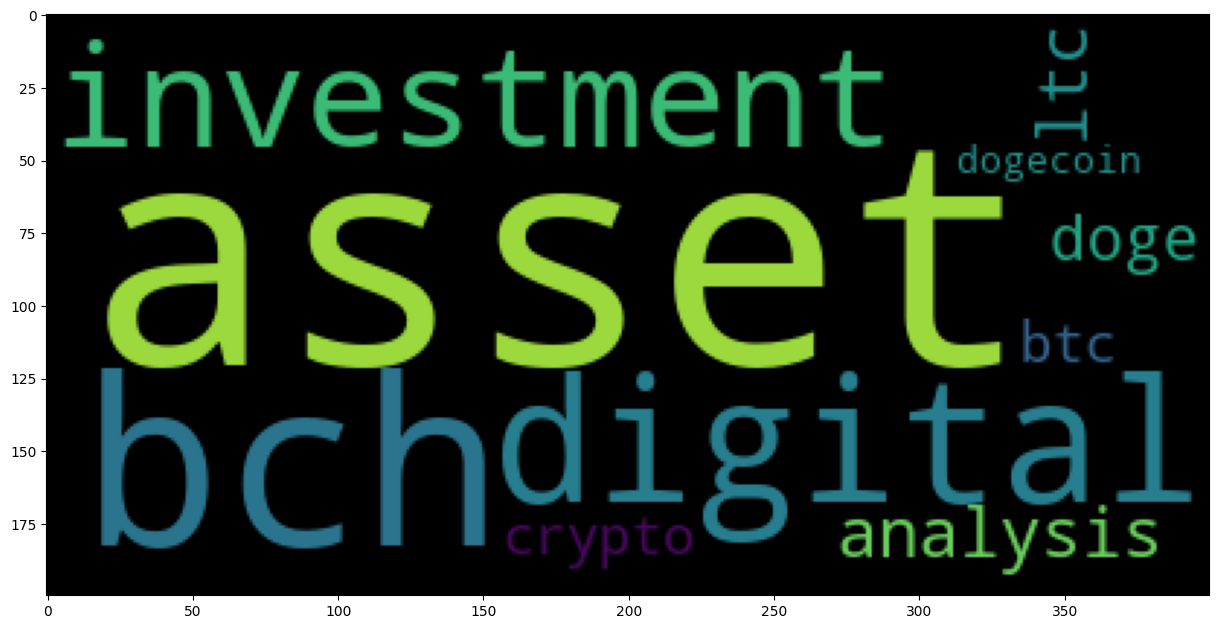

In [ ]:
wordcloud = WordCloud().generate_from_frequencies(data[0])

# plotting word cloud
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(11)

plt.imshow(wordcloud)

### Joining The dogecoin and Random Person's Post's data

In [ ]:
frames = [df_twt, df]
result = pd.concat(frames, join="outer", ignore_index=True)
result


,Unnamed: 0,User,Date Created,Number of Likes,Source of Tweet,Tweet,Date,Open,High,Low,Close,Adj Close,Volume
0,0.0,webnowcompany,2020-12-30 23:58:38+00:00,1.0,webnowcompany,#DOGE #LTC #RDD #BTC #BCH #CAG #SPHR Dogecoin ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,webnowcompany,2020-12-30 23:58:38+00:00,0.0,webnowcompany,"#DOGE #RDD #BTC #BCH #RVN #ETN Reddcoin (RDD),...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,DanO37088867,2020-12-30 23:58:37+00:00,1.0,Twitter for Android,"@DogeTop5 If in secret, Musk has a team workin...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,marsbux,2020-12-30 23:57:18+00:00,3.0,Twitter Web App,@elonmusk Sure wish MarsBux would be the crypt...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,x_xiishei,2020-12-30 23:55:52+00:00,0.0,Twitter Web App,@LilBibby_ invest into dogecoin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11801,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-14,0.059666,0.060943,0.058315,0.058643,0.058643,242691429.0
11802,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-15,0.058638,0.059567,0.058146,0.058580,0.058580,182208164.0
11803,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-16,0.058583,0.059415,0.058583,0.058914,0.058914,162246280.0
11804,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-17,0.058913,0.060057,0.058625,0.059935,0.059935,174261450.0


In [ ]:
file_name = 'result.csv'
  
# saving the excelsheet
result.to_csv(file_name)
print('Random Post is successfully exported into CSV')


Random Post is successfully exported into CSV


In [ ]:
data = pd.read_csv(r"result.csv")

### Visual Representation of Price up-Down

In [ ]:

fig = go.Figure(data=go.Ohlc(x=data['Date'],
                             open=data['Open'],
                             high=data['High'],
                             low=data['Low'],
                             close=data['Close']))
  
# show the figure
fig.show()

### Loading All Data Of Elon Musk's Tweeter Post data about dogecoin

In [ ]:
file_path = "data"
#list all the files from the directory
file_list = os.listdir(file_path)
file_list

['2021.csv',
 '2014.csv',
 '2013.csv',
 '2012.csv',
 '2015.csv',
 '2020.csv',
 '2018.csv',
 '2016.csv',
 '2011.csv',
 '2010.csv',
 '2017.csv',
 '2019.csv']

In [ ]:
import glob
#list all csv files only
csv_files = glob.glob('*.{}'.format('csv'))
csv_files

['2017.csv',
 '2010.csv',
 '2019.csv',
 '2018.csv',
 '2011.csv',
 '2016.csv',
 '2015.csv',
 '2012.csv',
 '2020.csv',
 '2021.csv',
 '2013.csv',
 '2014.csv']

In [ ]:
df_append = pd.DataFrame()
#append all files together
for file in csv_files:
            df_temp = pd.read_csv(file)
            df_append = df_append.append(df_temp, ignore_index=True)
df_append

/tmp/ipykernel_15269/3254637134.py:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_15269/3254637134.py:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_15269/3254637134.py:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_15269/3254637134.py:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_15269/3254637134.py:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_15269/3254637134.py:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,0,945814723521417217,945712432416137217,1.514335e+12,2017-12-27 00:32:57,0,NaN,@neilsiegel @Tesla Coming very soon,en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'neilsiegel', 'name': 'Neil S...",NaN,NaN,NaN,NaN
1,1,945749747129659392,945712432416137217,1.514319e+12,2017-12-26 20:14:45,0,NaN,@Kreative Vastly better maps/nav coming soon,en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Kreative', 'name': 'Leslie',...",NaN,NaN,NaN,NaN
2,2,945748731197980672,945712432416137217,1.514319e+12,2017-12-26 20:10:43,0,NaN,@dd_hogan Ok,und,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'dd_hogan', 'name': 'Live4EVD...",NaN,NaN,NaN,NaN
3,3,945730195113365504,945727773493968896,1.514315e+12,2017-12-26 18:57:03,0,NaN,@Jason @Tesla Sure,en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Jason', 'name': 'jason@calac...",NaN,NaN,NaN,NaN
4,4,945729852874694656,945712432416137217,1.514315e+12,2017-12-26 18:55:42,0,NaN,"@kabirakhtar Yeah, it’s terrible. Had to upgra...",en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'kabirakhtar', 'name': 'kabir...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43069,918,142881284019060736,142881284019060736,1.322901e+12,2011-12-03 08:22:07,0,NaN,That was a total non sequitur btw,en,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
43070,919,142880871391838208,142880871391838208,1.322900e+12,2011-12-03 08:20:28,0,NaN,"Great Voltaire quote, arguably better than Twa...",en,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
43071,920,142188458125963264,142188458125963264,1.322735e+12,2011-12-01 10:29:04,0,NaN,I made the volume on the Model S http://t.co/...,en,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
43072,921,142179928203460608,142179928203460608,1.322733e+12,2011-12-01 09:55:11,0,NaN,Went to Iceland on Sat to ride bumper cars on ...,en,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [ ]:
search_by_dogecoin=df_append.loc[df_append['tweet'].str.contains("dogecoin",case=False)]

In [ ]:
search_by_dogecoin

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
5360,2192,1113178951403180032,1113178951403180032,1.554238e+12,2019-04-02 20:38:38,0,NaN,Dogecoin value may vary https://t.co/UWerAhPv63,en,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
5361,2193,1113173498384441344,1113173498384441344,1.554236e+12,2019-04-02 20:16:58,0,NaN,Dogecoin rulz https://t.co/flWWUgAgLU,ht,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
5362,2194,1113164389929160706,1113145654363119616,1.554234e+12,2019-04-02 19:40:46,0,NaN,@dogecoin Uh oh,en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'dogecoin', 'name': 'Dogecoin...",NaN,NaN,NaN,NaN
5363,2195,1113009339743100929,1113008901497278465,1.554197e+12,2019-04-02 09:24:39,0,NaN,@Tom_Heats Dogecoin might be my fav cryptocurr...,en,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
19713,2355,1254039929333649409,1254014899950366720,1.587821e+12,2020-04-25 13:29:52,0,NaN,@28delayslater @justpaulinelol Dogecoin Mode,en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': '28delayslater', 'name': '🐶Ea...",NaN,NaN,NaN,NaN
22955,5597,1113178951403180032,1113178951403180032,1.554238e+12,2019-04-02 20:38:38,0,NaN,Dogecoin value may vary https://t.co/UWerAhPv63,en,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
22956,5598,1113173498384441344,1113173498384441344,1.554236e+12,2019-04-02 20:16:58,0,NaN,Dogecoin rulz https://t.co/flWWUgAgLU,ht,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
22957,5599,1113164389929160706,1113145654363119616,1.554234e+12,2019-04-02 19:40:46,0,NaN,@dogecoin Uh oh,en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'dogecoin', 'name': 'Dogecoin...",NaN,NaN,NaN,NaN
22958,5600,1113009339743100929,1113008901497278465,1.554197e+12,2019-04-02 09:24:39,0,NaN,@Tom_Heats Dogecoin might be my fav cryptocurr...,en,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
29133,58,1370883943143251968,1370882536101056523,1.615679e+12,2021-03-13 23:46:16,0,NaN,Origin of Doge Day Afternoon: The ancient Roma...,en,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


### Join Elon Musk's Post data & dogecoin data

In [ ]:
frames = [search_by_dogecoin, df]
elon = pd.concat(frames, join="outer", ignore_index=True)
elon

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,translate,trans_src,trans_dest,Date,Open,High,Low,Close,Adj Close,Volume
0,2192.0,1.113179e+18,1.113179e+18,1.554238e+12,2019-04-02 20:38:38,0.0,NaN,Dogecoin value may vary https://t.co/UWerAhPv63,en,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2193.0,1.113173e+18,1.113173e+18,1.554236e+12,2019-04-02 20:16:58,0.0,NaN,Dogecoin rulz https://t.co/flWWUgAgLU,ht,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2194.0,1.113164e+18,1.113146e+18,1.554234e+12,2019-04-02 19:40:46,0.0,NaN,@dogecoin Uh oh,en,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2195.0,1.113009e+18,1.113009e+18,1.554197e+12,2019-04-02 09:24:39,0.0,NaN,@Tom_Heats Dogecoin might be my fav cryptocurr...,en,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2355.0,1.254040e+18,1.254015e+18,1.587821e+12,2020-04-25 13:29:52,0.0,NaN,@28delayslater @justpaulinelol Dogecoin Mode,en,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2022-10-14,0.059666,0.060943,0.058315,0.058643,0.058643,242691429.0
1824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2022-10-15,0.058638,0.059567,0.058146,0.058580,0.058580,182208164.0
1825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2022-10-16,0.058583,0.059415,0.058583,0.058914,0.058914,162246280.0
1826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2022-10-17,0.058913,0.060057,0.058625,0.059935,0.059935,174261450.0


In [ ]:

file_name = 'elon.csv'
  
# saving the excelsheet
elon.to_csv(file_name)
print('Random Post is successfully exported into CSV')
data = pd.read_csv(r"elon.csv")


Random Post is successfully exported into CSV


### Visualizing the Price up-down for the Joined table

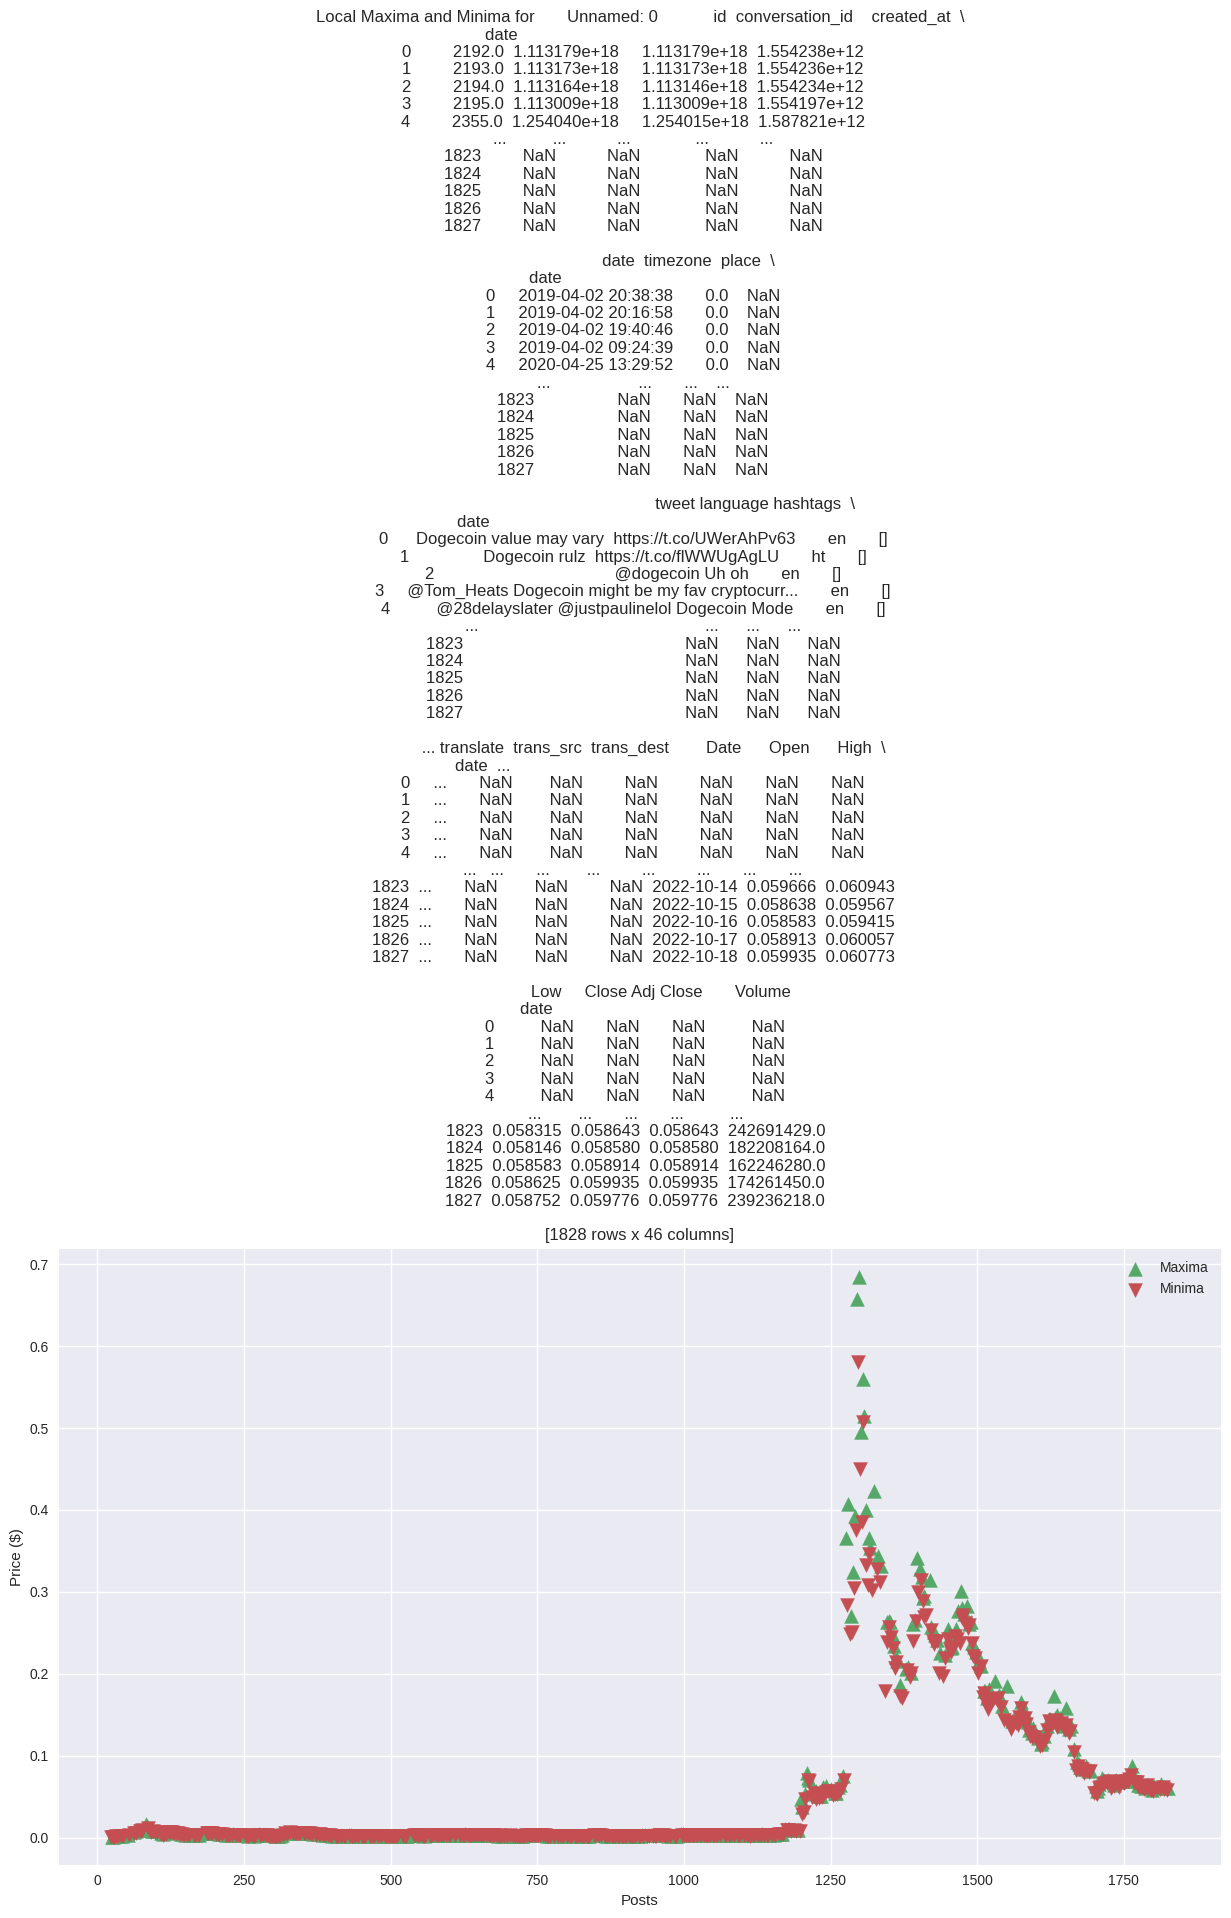

In [ ]:
data['High'] = data['Close'][
  (data['Close'].shift(1) < data['Close']) &
  (data['Close'].shift(-1) < data['Close'])]

data['Low'] = data['Close'][
  (data['Close'].shift(1) > data['Close']) &
  (data['Close'].shift(-1) > data['Close'])]

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.figure(figsize=(15, 8))
plt.plot(data['Low'], zorder=0)
plt.scatter(data.index, data['High'], s=100,
  label='Maxima', marker='^', c=colors[1])
plt.scatter(data.index, data['Low'], s=100,
  label='Minima', marker='v', c=colors[2])
plt.xlabel('Posts')
plt.ylabel('Price ($)')
plt.title(f'Local Maxima and Minima for {elon}')
plt.legend()
plt.show()

###  The dogecoin data and The data of random people  Post's Moving Averages
### And
### The dogecoin data and The data of Elon Musk's  Post's Moving Averages


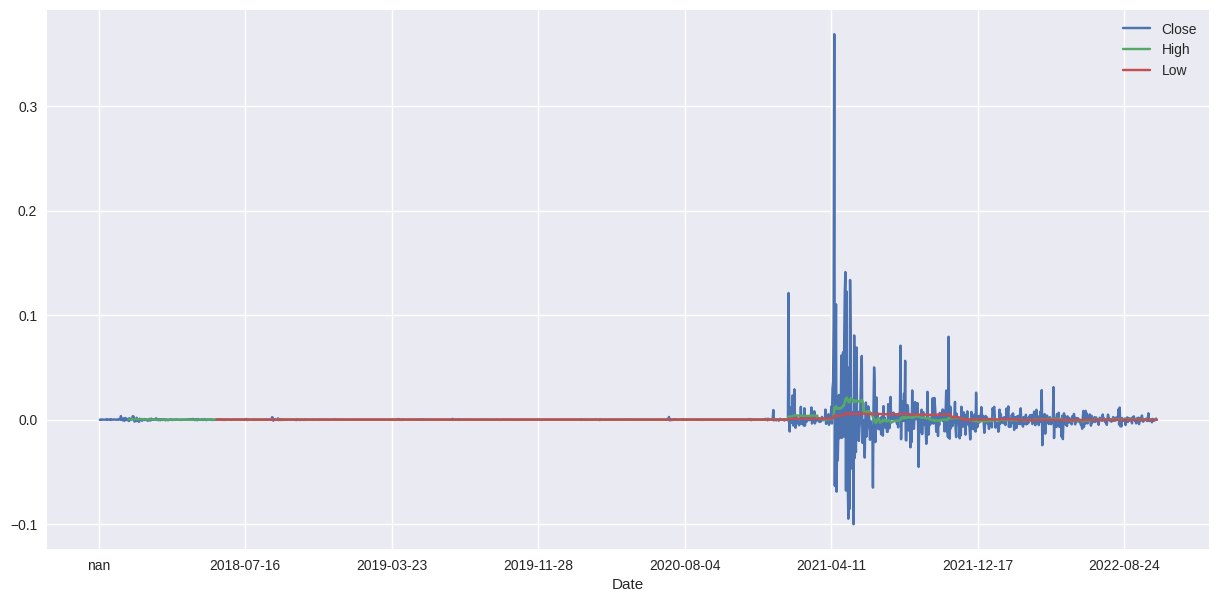

In [ ]:
result['High'] = result['Close'].rolling(50).mean()
result['Low'] = result['Close'].rolling(200).mean()
result['Close'].plot(figsize = (15,7))
result['High'].plot()
result['Low'].plot()
plt.legend()

### Volatility for Random Person's Post VS Elon Musk's Post for Dogecoin

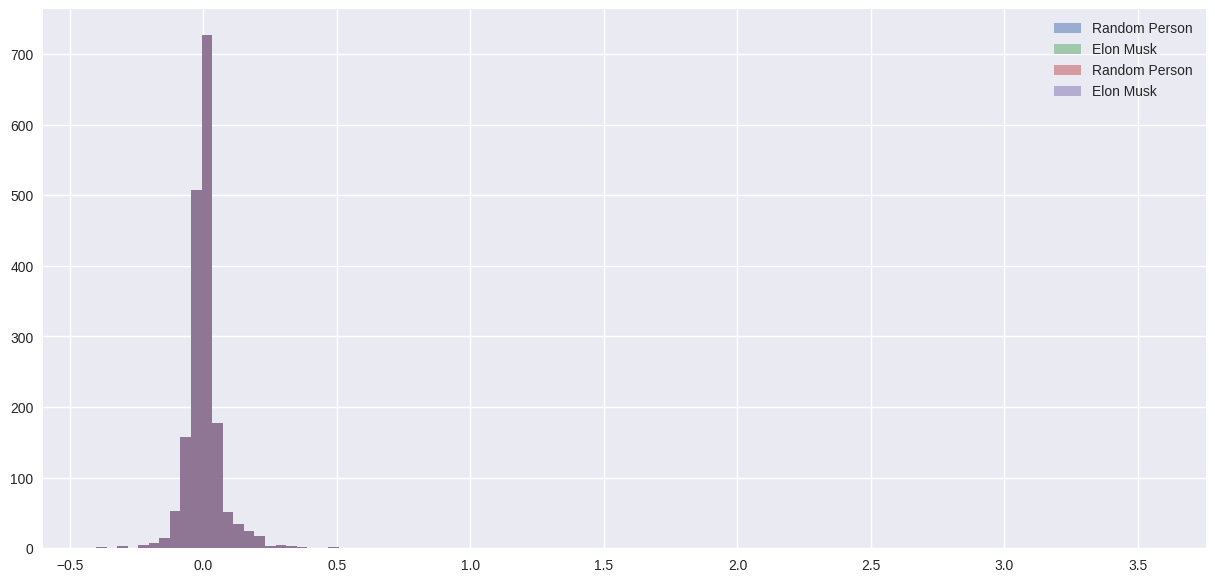

In [ ]:
#Volatility
result['High'] = (result['Close']/result['Close'].shift(1)) -1
elon['High'] = (elon['Close']/elon['Close'].shift(1))-1
result['Low'] = (result['Close']/result['Close'].shift(1)) -1
elon['Low'] = (elon['Close']/elon['Close'].shift(1))-1
result['High'].hist(bins = 100, label = 'Random Person', alpha = 0.5, figsize = (15,7))
elon['High'].hist(bins = 100, label = 'Elon Musk', alpha = 0.5)
result['Low'].hist(bins = 100, label = 'Random Person', alpha = 0.5)
elon['Low'].hist(bins = 100, label = 'Elon Musk', alpha = 0.5)
plt.legend()

### Market Capitalization for Random Person's Post VS Elon Musk's Post for Dogecoin

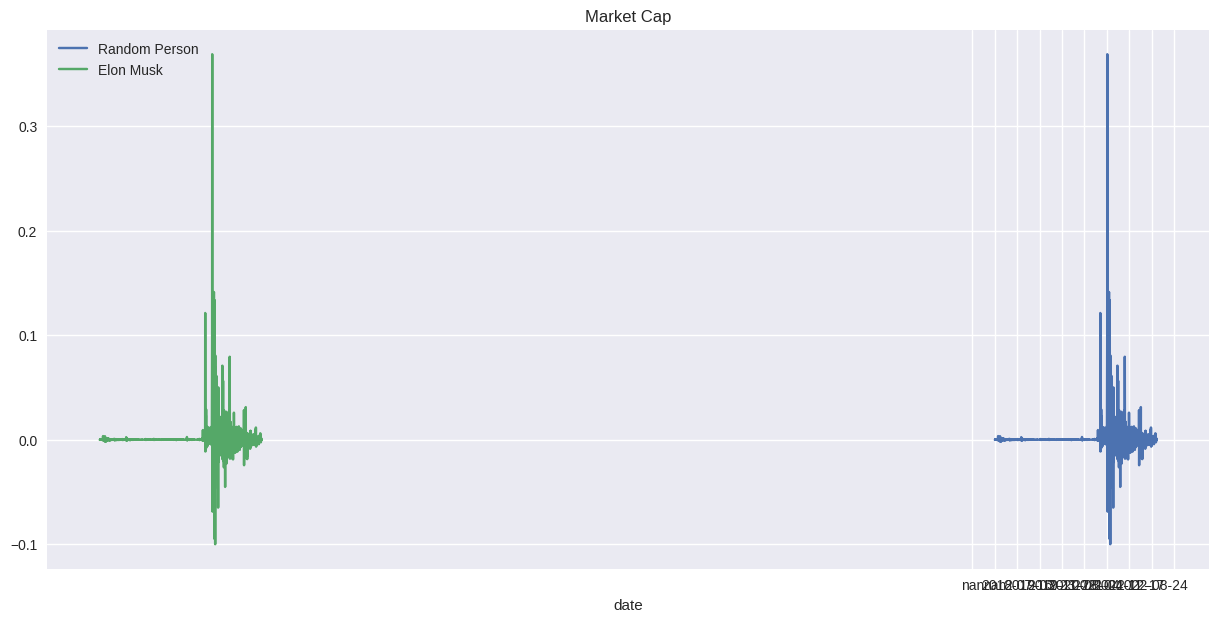

In [ ]:
result['Close'] = result['Low'] * result['Close']
elon['Close'] = elon['Low'] * elon['Close']

result['Close'].plot(label = 'Random Person', figsize = (15,7))
elon['Close'].plot(label = 'Elon Musk')
plt.title('Market Cap')
plt.legend()

## Price Volume for Random Person's Post VS Elon Musk's Post for Dogecoin

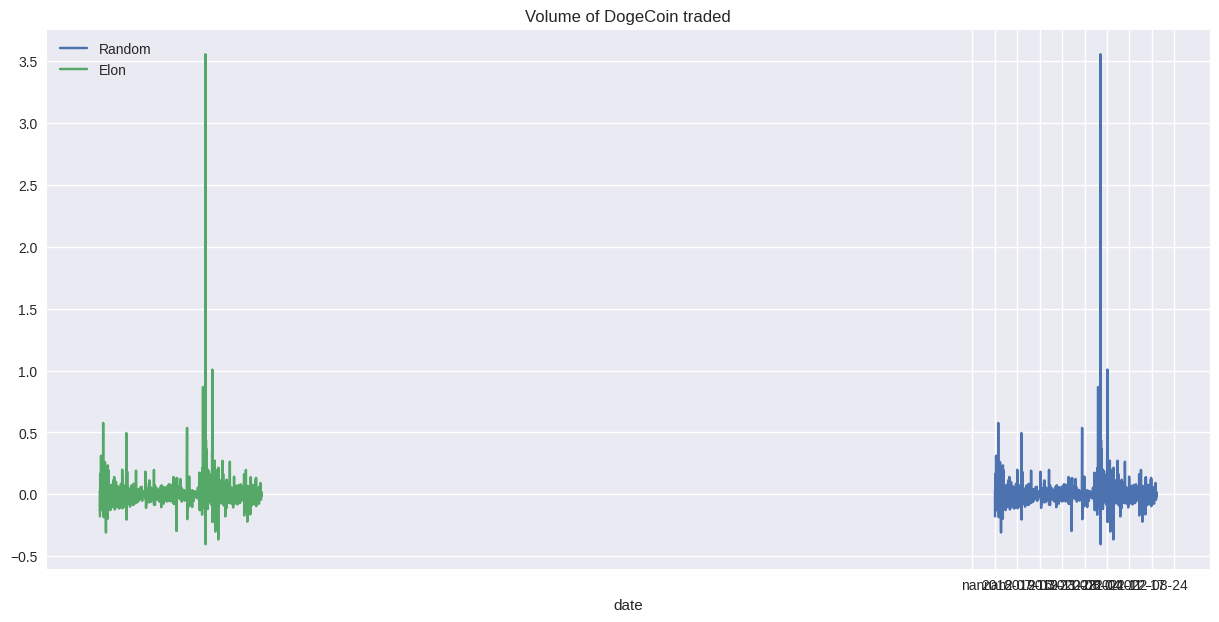

In [ ]:
result['Low'].plot(label = 'Random', figsize = (15,7))
elon['Low'].plot(label = "Elon")
plt.title('Volume of DogeCoin traded')
plt.legend()

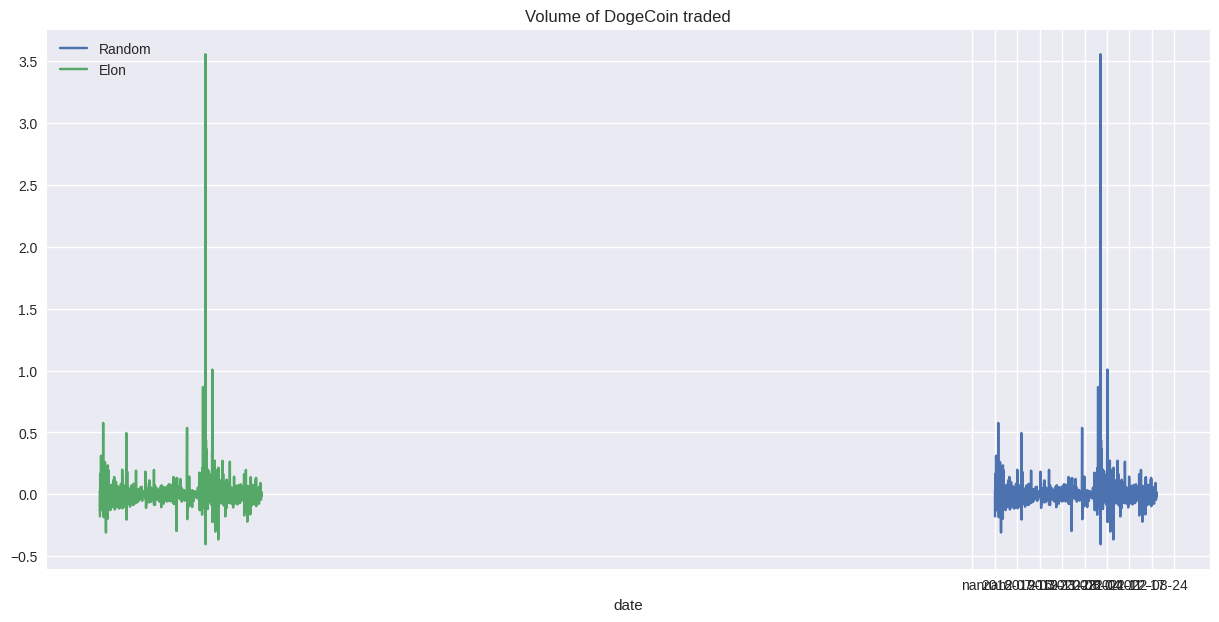

In [ ]:
result['High'].plot(label = 'Random', figsize = (15,7))
elon['High'].plot(label = "Elon")
plt.title('Volume of DogeCoin traded')
plt.legend()

### Price Comparison After Elon Musk's Post and Random People's Post

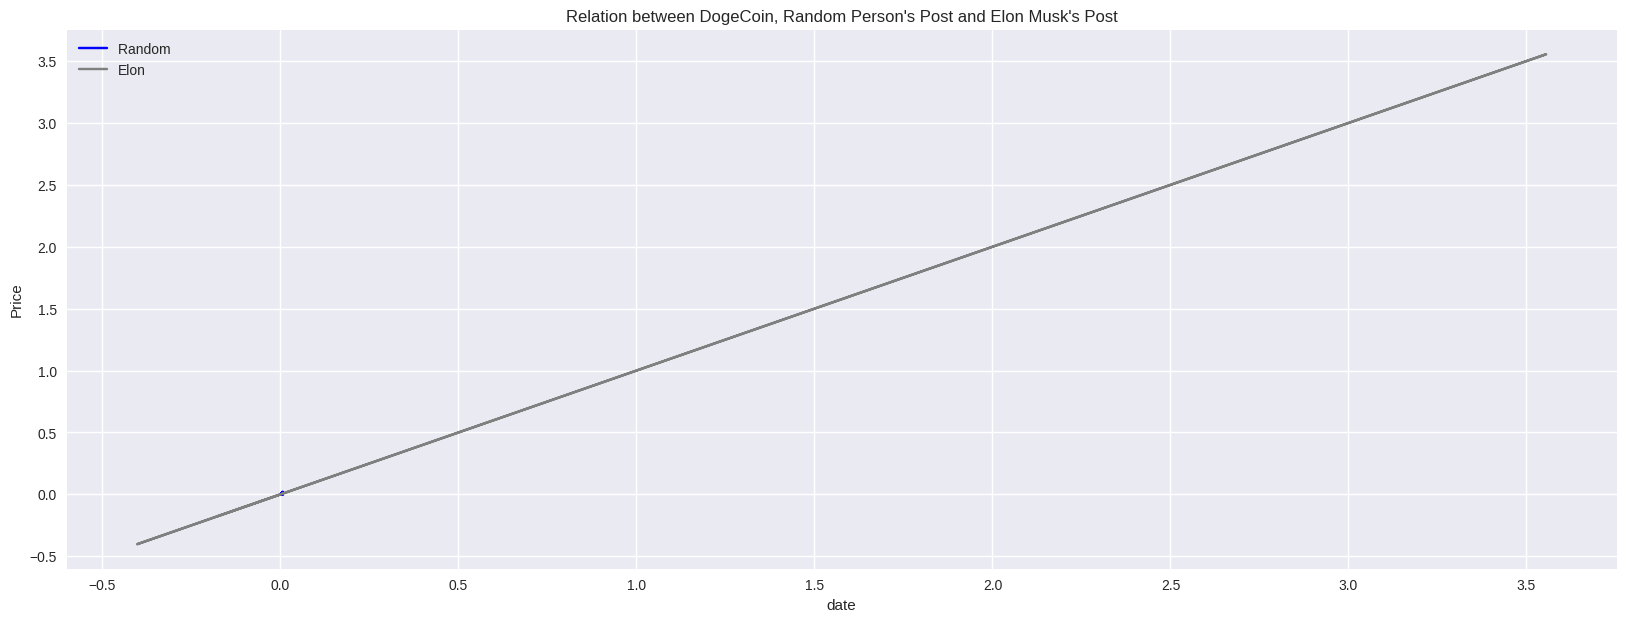

In [ ]:
plt.figure(figsize=(20,7))

plt.plot(result['Low'],result['High'],color='blue',label='Random ')

plt.plot(elon['Low'],elon['High'],color='grey',label='Elon')



plt.title("Relation between DogeCoin, Random Person's Post and Elon Musk's Post")

plt.xlabel("date")

plt.ylabel("Price")

plt.legend(title="")

plt.show()


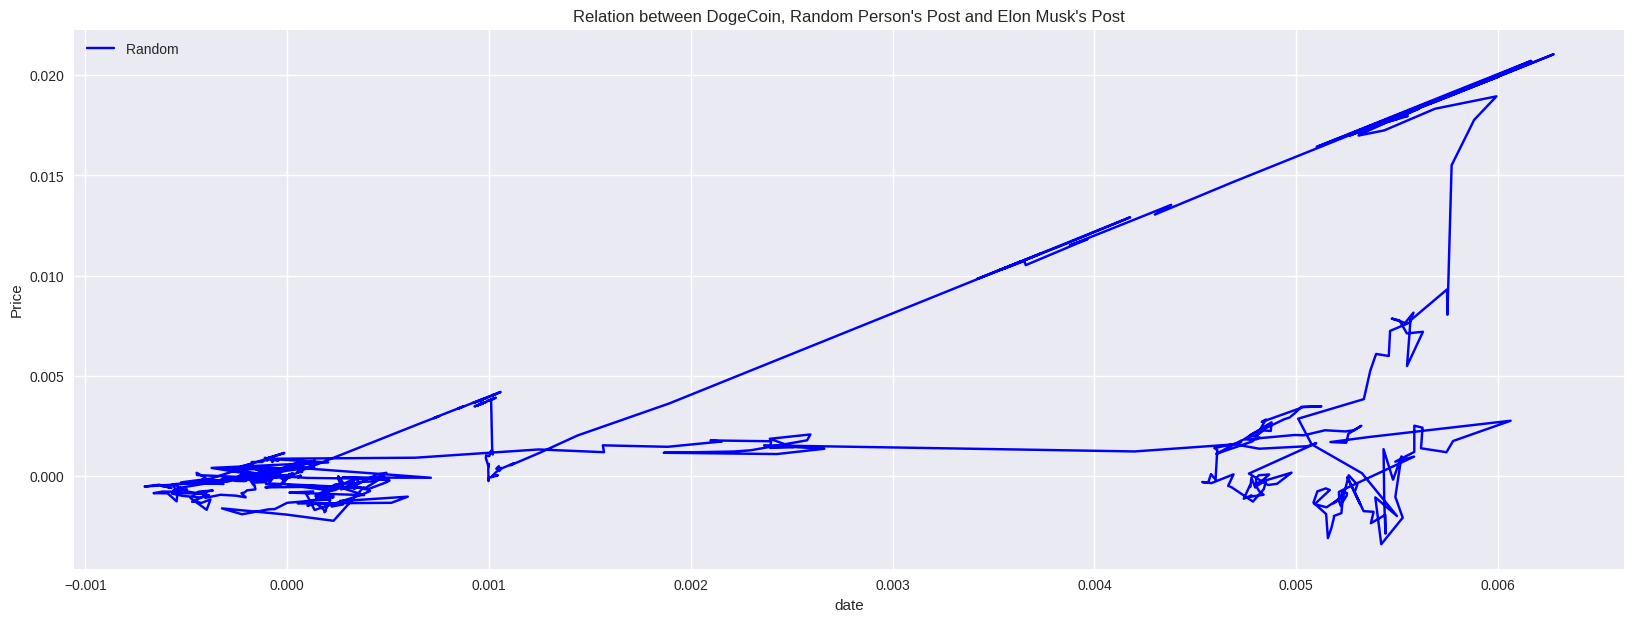

In [ ]:
plt.figure(figsize=(20,7))

plt.plot(result['Low'],result['High'],color='blue',label='Random ')




plt.title("Relation between DogeCoin, Random Person's Post and Elon Musk's Post")

plt.xlabel("date")

plt.ylabel("Price")

plt.legend(title="")

plt.show()
